# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [94]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [75]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [76]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset. Para ello, vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

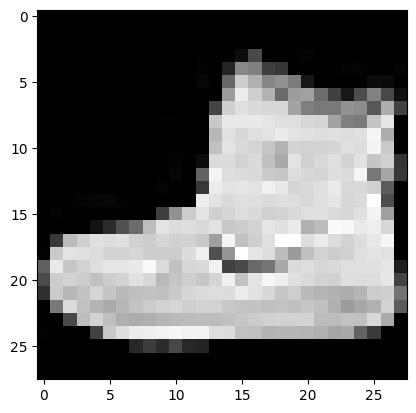

In [77]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [78]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [79]:
num_training_images = len(training_images)
num_test_images = len(test_images)

dim_images = training_images[0].shape

print('Número de imágenes de entrenamiento:', num_training_images)
print('\nNúmero de imágenes de test:', num_test_images)
print('\nDimensiones de cada imagen:', dim_images)

Número de imágenes de entrenamiento: 60000

Número de imágenes de test: 10000

Dimensiones de cada imagen: (28, 28)


En primer lugar, calculamos el número de imágenes que hay en los conjuntos de entrenamiento y de test midiendo la longitud de ambos valores normalizados.

Tras ello, obtenemos las dimensiones de las imágenes de entrenamiento, asumiendo que todas tienen la misma dimensión. Para ello, accedemos a la primera imagen del conjunto de entrenamiento y utilizamos el atributo 'shape' para obtener las dimensiones de la imagen.

Por último, sacamos los resultados por pantalla.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

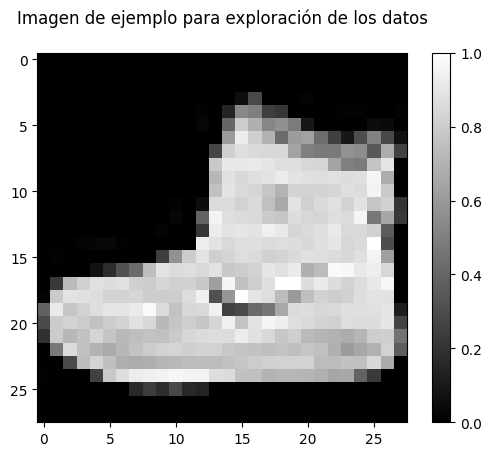

Matriz de píxeles de la imagen de ejemplo
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.     

In [80]:
image_1 = training_images[0]
label_1 = training_labels[0]

plt.imshow(image_1, cmap="gray")
plt.title('Imagen de ejemplo para exploración de los datos\n')
plt.colorbar()
plt.show()

print('Matriz de píxeles de la imagen de ejemplo\n', image_1)
print('\nEtiqueta de la imagen de ejemplo:', label_1)

En la celda anterior, seleccionamos la primera imagen para realizar la exploración de los datos y los mostramos por pantalla.

Cada una de las imágenes del dataset Fashion MNIST es una matriz de dimensiones 28x28 píxeles. Cada elemento de la matriz representa la intensidad de un píxel en escala de grises, donde 0 es negro y 255 blanco. Las escalas de grises son utilizadas normalmente en tareas de visión artificial para simplificar el procesamiento, siempre y cuando el color no nos aporte información crucial para el análisis.

La etiqueta (y) es un número entero entre 0 y 9 que corresponde con un tipo de prenda específico en el dataset. Según el repositorio de GitHub donde se muestra toda la información relativa al dataset Fashion MNIST (facilitado al inicio de este Notebook), cada número corresponde con la siguiente prenda: 0- T-shirt/Tops; 1- Trousers; 2- Pullover; 3- Dress; 4- Coat; 5- Sandal; 6- Shirt; 7- Sneaker; 8- Bag; 9- Ankle boot

Como podemos comprobar, nuestro código ha clasificado correctamente las Nike Air Jordan como 'bota o zapatilla tobillera'

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [81]:
# Definimos el modelo
model = Sequential([Flatten(input_shape=(28, 28)), # Aplanamos la entrada de imágenes 28x28 a un vector
                    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación relu
                    Dense(10, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7670 - loss: 0.6705 - val_accuracy: 0.8480 - val_loss: 0.4267
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8603 - loss: 0.3963 - val_accuracy: 0.8593 - val_loss: 0.4005
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8709 - loss: 0.3566 - val_accuracy: 0.8628 - val_loss: 0.3907
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8816 - loss: 0.3241 - val_accuracy: 0.8702 - val_loss: 0.3607
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8889 - loss: 0.3062 - val_accuracy: 0.8703 - val_loss: 0.3664
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8931 - loss: 0.2898 - val_accuracy: 0.8835 - val_loss: 0.3345
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8955 - loss: 0.2785 - val_accuracy: 0.8795 - val_loss: 0.3380
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9031 - loss: 0.2640 - val_accuracy: 0.8801 - val_

Para definir y entrenar la red neuronal, en primer lugar, debemos incluir 'Flatten' en la importación de bibliotecas al inicio del Notebook, ya que no estaba añadida > from keras.layers import Dense, Flatten

Ahora, podemos definir el modelo que consta de las siguientes partes:

· Uso de Flatten en la entrada para convertir las imágenes de 28x28 píxeles en un vector unidimensional para poder procesarlas en la capa densa.
· Utilizamos una capa oculta con Dense con 128 neuronas y función de activación ReLU para activar la neurona sólo si la entrada es positiva, o cero en caso contrario como se ha definido anteriormente.
· Finalizamos con otra capa Dense con 10 neuronas, que corresponden a cada uno de los tipos de ropa que contiene el dataset, utilizando una función softmax para obtener probabilidades.

Tras formar el modelo, lo compilamos utilizando un optimizador Adam, una función de pérdida sparse_categorical_crossentropy (adecuada para etiquetas de clases de tipo entero) y midiendo la precisión (accuracy) durante el entrenamiento del modelo para monitorizar el rendimiento del mismo.

Por último, entrenamos el modelo durante 10 epochs con un tamaño de lote igual a 64. Durante el entrenamiento también validamos el modelo usando los datos de test.

Como podemos observar al ejecutar el código, los datos de accuracy van creciendo conforme se aportan más datos de entrenamiento al modelo. Estos son superiores al 80% exigido en la práctica.

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [82]:
# Evaluamos el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8804 - loss: 0.3400
Test accuracy: 0.8799999952316284
Test loss: 0.33505600690841675


Utilizamos el método 'evaluate' para enviar a nuestro modelo las imágenes y etiquetas de test para calcular la pérdida y precisión del modelo en el dataset.

Estos resultados son importantes para evaluar cómo el modelo maneja los datos que no se utilizaron durante el entrenamiento, lo que nos proporciona una estimación sobre cómo se comportará nuestro modelo ante nuevos datos generales, es decir, para no incurrir en que nuestro modelo únicamente funcione con los datos iniciales.

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de la predicción de la red neuronal

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [83]:
classifications = model.predict(test_images)
print('Clasificación con 128 neuronas:\n', classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
Clasificación con 128 neuronas:
 [1.1136519e-06 3.4594724e-08 5.2151663e-06 5.8225424e-07 1.2393685e-08 6.6618505e-04 3.6788563e-07 1.1147785e-02 1.7586530e-06 9.8817700e-01]


El resultado tras imprimir la variable del clasificador es un vector de 10 números que corresponde a la probabilidad de que la imagen de entrada (en este caso la primera) corresponda a una de los 10 tipos de prendas de ropa del dataset Fashion MNIST. Cada índice del vector representa una clase específica del dataset. El valor en cada posición del vector indica la probabilidad de que la imagen pertenezca a la clase correspondiente a dicho índice. La clase predicha por el modelo para una imagen será la que tenga un valor superior en el vector de probabilidades.

En nuestro caso, la clase que tiene mayor probabilidad es el último índice del vector, que corresponde a la clase 'bota o zapatilla tobillera'. El modelo arroja un 99% de probabilidad de que la imagen analizada corresponde a esta categoría de ropa.

Para casos donde los índices sean muy parejos y para no dejarnos la vista analizando los valores exponenciales que se muestran en el vector, podríamos utilizar la función de numpy '.argmax()' para encontrar de forma más sencilla el valor máximo en el vector de probabilidades.

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [84]:
# Definimos el modelo
model_512 = Sequential([Flatten(input_shape=(28, 28)), # Aplanamos la entrada de imágenes 28x28 a un vector
                    Dense(512, activation='relu'), # Capa oculta con 512 neuronas y activación relu
                    Dense(10, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model_512.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model_512.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluamos el modelo en el conjunto de test
test_loss, test_accuracy = model_512.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_accuracy)
print('Test loss:', test_loss)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7909 - loss: 0.6035 - val_accuracy: 0.8376 - val_loss: 0.4426
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8652 - loss: 0.3744 - val_accuracy: 0.8630 - val_loss: 0.3777
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8799 - loss: 0.3294 - val_accuracy: 0.8694 - val_loss: 0.3573
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8905 - loss: 0.3016 - val_accuracy: 0.8712 - val_loss: 0.3586
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8952 - loss: 0.2793 - val_accuracy: 0.8795 - val_loss: 0.3402
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9022 - loss: 0.2670 - val_accuracy: 0.8726 - val_loss: 0.3508
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9056 - loss: 0.2571 - val_accuracy: 0.8852 - val_loss: 0.3281
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9108 - loss: 0.2386 - val_accuracy: 0.

In [85]:
# Definimos el modelo
model_1024 = Sequential([Flatten(input_shape=(28, 28)), # Aplanamos la entrada de imágenes 28x28 a un vector
                    Dense(1024, activation='relu'), # Capa oculta con 1024 neuronas y activación relu
                    Dense(10, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model_1024.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model_1024.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluamos el modelo en el conjunto de test
test_loss, test_accuracy = model_1024.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_accuracy)
print('Test loss:', test_loss)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7970 - loss: 0.5851 - val_accuracy: 0.8483 - val_loss: 0.4170
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8681 - loss: 0.3657 - val_accuracy: 0.8602 - val_loss: 0.3854
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8846 - loss: 0.3173 - val_accuracy: 0.8619 - val_loss: 0.3846
Epoch 4/10
916/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8915 - loss: 0.2943

KeyboardInterrupt: 

**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? 

Al cambiar el número de neuronas de la capa oculta y entrenar el modelo, podemos observar como los tiempos de respuesta aumentan de forma proporcional cuantas más neuronas existen en la red. Estos modelos requieren de más memoria y tiempo de computación, aunque en este caso no suponen ningún problema.

Ahora bien, si además de formar y entrenar las nuevas redes neuronales, evaluamos el rendimiento del modelo, podemos comprobar como los valores de accuracy en la red de 512 neuronas en la capa oculta es ligeramente superior que en la de 1024. Esto puede deberse a que se esté sobreajustando el modelo (overfitting) por aumentar demasiado el número de neuronas, lo que puede reducir la precisión. Gracias a la evaluación del modelo podemos entender mejor los valores de rendimiento del modelo (no sólo viendo el desarrollo del entrenamiento).

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [ ]:
classifications_512 = model_512.predict(test_images)
print('Clasificación con 512 neuronas:\n', classifications_512[0])

# Determinamos la clase predicha por el modelo de forma sencilla
pred_512 = np.argmax(classifications_512[0])
print('\nClase predicha por el modelo con 512 neuronas en la capa oculta:', pred_512)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
Clasificación con 512 neuronas:
 [8.7733270e-07 3.5910794e-08 7.8748776e-08 3.6780420e-08 3.5304151e-06 5.8638211e-02 1.9183221e-06 2.3564139e-02 4.2028537e-07 9.1779083e-01]

Clase predicha por el modelo con 512 neuronas en la capa oculta: 9


In [ ]:
classifications_1024 = model_1024.predict(test_images)
print('Clasificación con 1024 neuronas:\n', classifications_1024[0])

# Determinamos la clase predicha por el modelo de forma sencilla
pred_1024 = np.argmax(classifications_1024[0])
print('\nClase predicha por el modelo con 1024 neuronas en la capa oculta:', pred_1024)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Clasificación con 1024 neuronas:
 [4.7920821e-07 5.8147132e-10 1.3423413e-09 4.1538033e-11 3.0823365e-08 1.1502149e-03 3.6500109e-07 4.5721307e-03 2.5309375e-09 9.9427682e-01]

Clase predicha por el modelo con 1024 neuronas en la capa oculta: 9


Como podemos ver tanto en el vector como (de forma más sencilla) en la salida al aplicar la función np.argmax para cada modelo con 512 y 1024 neuronas, el resultado es el mismo que para el modelo con 128 neuronas en la capa oculta. El modelo clasifica la primera imagen como la clase 9 del dataset Fashion MNIST.

A medida que aumenta el número de neuronas en la capa oculta, el porcentaje de fiabilidad del modelo aumenta. En este caso, aumenta muy poco, ya que el modelo predice con gran seguridad (>99%) que la imagen pertenece a la clase tipo 9. Hay que tener en cuenta que un aumento excesivo del número de neuronas podría tener un mayor riesgo de sobreajuste del modelo.

# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar por qué da el error que da?



In [ ]:
# Definimos el modelo
model_sinFlatten = Sequential([Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación relu
                    Dense(10, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model_sinFlatten.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model_sinFlatten.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 28, 10)

El 'ValueError' que recibimos tras quitar la capa Flatten al intentar construir nuestro modelo, el cual trabaja con imágenes, hace referencia a que no podemos conectar una capa Dense con las imágenes de entrada en formato matriz, ya que esta capa espera recibir de forma interna una única dimensión para cada muestra.

En el dataset Fashion MNIST tenemos imágenes formadas por matrices de 28x28 píxeles. Sin una capa Flatten para transformar las matrices en vectores unidimensionales, las capas Dense de las capas ocultas y de salida no pueden procesar los datos.

La capa Flatten es crucial en el procesamiento de imágenes con redes neuronales densas.

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
# Definimos el modelo
model_6 = Sequential([Flatten(input_shape=(28, 28)), # Aplanamos la entrada de imágenes 28x28 a un vector
                    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación relu
                    Dense(5, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model_6.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model_6.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\asyncio\base_events.py", line 608, in run_forever

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\asyncio\events.py", line 84, in _run

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\migue\AppData\Local\Temp\ipykernel_82756\2510812629.py", line 12, in <module>

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\losses\losses.py", line 1722, in sparse_categorical_crossentropy

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 1 1 9 9 6 8 7 1 0 9 7 4 3 6 5 7 3 6 5 0 4 2 1 5 0 4 4 0 0 9 6 6 0 1 5 2 9 7 9 1 6 2 4 1 4 2 2 5 6 3 2 4 8 2 5 8 1 5 5 8 9 4 2
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_167140]

La última capa de nuestra red neuronal tiene que tener 10 neuronas porque corresponde con el número de clases distintas del dataset (10 tipos de prendas).
Cada neurona en la capa de salida corresponde a una de estas clases.

Cuando cambiamos el número de neuronas en la última capa de nuestra red por 5 (u otro número distinto de 10), el modelo sólo podrá clasificar entre ese número de categorías de ropa posibles. Esto causa un error de ejecución porque las categorías del dataset siguen siendo 10 y las salidas de nuestro modelo sólo 5, por lo que obtenemos una discrepancia entre etiquetas y salidas.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 10.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
# Definimos el modelo
model_15epoch = Sequential([Flatten(input_shape=(28, 28)), # Aplanamos la entrada de imágenes 28x28 a un vector
                    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación relu
                    Dense(10, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model_15epoch.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model_15epoch.fit(training_images, training_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/15


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7731 - loss: 0.6595 - val_accuracy: 0.8482 - val_loss: 0.4304
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8601 - loss: 0.3962 - val_accuracy: 0.8556 - val_loss: 0.4120
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8728 - loss: 0.3519 - val_accuracy: 0.8668 - val_loss: 0.3665
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.3228 - val_accuracy: 0.8704 - val_loss: 0.3589
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8897 - loss: 0.3047 - val_accuracy: 0.8680 - val_loss: 0.3614
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8957 - loss: 0.2831 - val_accuracy: 0.8753 - val_loss: 0.3480
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8967 - loss: 0.2761 - val_accuracy: 0.8731 - val_loss: 0.3575
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9039 - loss: 0.2644 - val_accuracy: 0.8809 - val_

In [ ]:
# Definimos el modelo
model_30epoch = Sequential([Flatten(input_shape=(28, 28)), # Aplanamos la entrada de imágenes 28x28 a un vector
                    Dense(128, activation='relu'), # Capa oculta con 128 neuronas y activación relu
                    Dense(10, activation='softmax')]) # Capa de salida con activación softmax para 10 clases

# Compilamos el modelo
model_30epoch.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
entrenamiento = model_30epoch.fit(training_images, training_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7703 - loss: 0.6656 - val_accuracy: 0.8229 - val_loss: 0.4872
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8561 - loss: 0.4016 - val_accuracy: 0.8599 - val_loss: 0.4023
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss: 0.3528 - val_accuracy: 0.8711 - val_loss: 0.3715
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8828 - loss: 0.3208 - val_accuracy: 0.8615 - val_loss: 0.3795
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8875 - loss: 0.3083 - val_accuracy: 0.8751 - val_loss: 0.3492
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8942 - loss: 0.2872 - val_accuracy: 0.8720 - val_loss: 0.3595
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8978 - loss: 0.2788 - val_accuracy: 0.8672 - val_loss: 0.3611
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9027 - loss: 0.2624 - val_accuracy: 0.

Al aumentar el número de epoch en el entrenamiento de una red neuronal, permitimos que el modelo tenga más oportunidades de aprender de los datos. Es importante mantener un número de epoch ajustado a las necesidades del modelo, dependiendo del tamaño del dataset y la calidad de los datos.

Como se comenta en el enunciado, al incrementar el número de epoch de 10 a 15 vemos una mejora en el rendimiento del modelo, porque éste tiene más iteraciones para ajustar los pesos basándose en los datos de entrenamiento y reduciendo la pérdida.

Al aumentar a 30 epoch podemos observar como el valor de pérdidas disminuye de forma mucho más lenta, incluso en algunos casos (como en la epoch 22-23) puede aumentar.

El efecto más común en estos casos es el sobreajuste u overfitting, que hace referencia a cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y disminuye su capacidad de clasificar otros nuevos datos.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')> 0.85):
                  print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
                  self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

Creamos una clase 'myCallback' que hereda de 'tf.keras.callbacks.Callback'. Definimos un método 'on_epoch_end' para que se ejecute al final de cada epoch si se verifica que la pérdida (loss) es menor o igual al 40% (0.4).

In [ ]:
import tensorflow as tf
print(tf.__version__)

# Completamos el código con una clase callback tomando como ejemplo la celda anterior, pero modificando las condiciones dentro del if:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Comprobamos que la pérdida sea menor o igual al 40%:
        if logs.get('loss') <= 0.4:
            print('\nPérdida menor o igual al 40%. Cancelando el entrenamiento...')
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.16.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7935 - loss: 0.5827
Epoch 2/50
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3673
Pérdida menor o igual al 40%. Cancelando el entrenamiento...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8659 - loss: 0.3672


Como podemos observar en los resultados, el entrenamiento se ha detenido en el segundo epoch, cuando el valor de pérdida es inferior a 0.4.

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

En primer lugar, utilizaremos un modelo con función de activación sigmoid:

La función de activación sigmoid limita su salida a un rango entre 0 y 1, lo que la hace adecuada para problemas de clasificación binaria y estadística. Sin embargo, presenta algunas desventajas cuando se utiliza en redes profundas.

In [ ]:
# Definimos el modelo con función de activación sigmoid
model_sigmoid = Sequential([Flatten(input_shape=(28,28)),
                            Dense(128, activation='sigmoid'),
                            Dense(128, activation='sigmoid'),
                            Dense(128, activation='sigmoid'),
                            Dense(10, activation='softmax')])

model_sigmoid.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

entrenamiento_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6183 - loss: 1.0855 - val_accuracy: 0.8315 - val_loss: 0.4577
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8459 - loss: 0.4231 - val_accuracy: 0.8570 - val_loss: 0.3995
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.3725 - val_accuracy: 0.8628 - val_loss: 0.3711
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8737 - loss: 0.3477 - val_accuracy: 0.8701 - val_loss: 0.3579
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8805 - loss: 0.3280 - val_accuracy: 0.8762 - val_loss: 0.3366
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8911 - loss: 0.3001 - val_accuracy: 0.8712 - val_loss: 0.3421
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8923 - loss: 0.2901 - val_accuracy: 0.8758 - val_loss: 0.3401
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8982 - loss: 0.2762 - val_accurac

Pasamos al modelo con función de activación ReLU:

Este tipo de función de activación resuelve algunos problemas de las funciones sigmoid en redes profundas.

In [ ]:
# Definimos el modelo con función de activación sigmoid
model_relu = Sequential([Flatten(input_shape=(28,28)),
                            Dense(128, activation='relu'),
                            Dense(128, activation='relu'),
                            Dense(128, activation='relu'),
                            Dense(10, activation='softmax')])

model_relu.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

entrenamiento_sigmoid = model_relu.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7695 - loss: 0.6489 - val_accuracy: 0.8296 - val_loss: 0.4580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8574 - loss: 0.3873 - val_accuracy: 0.8487 - val_loss: 0.4016
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8724 - loss: 0.3406 - val_accuracy: 0.8740 - val_loss: 0.3527
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3141 - val_accuracy: 0.8816 - val_loss: 0.3259
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8877 - loss: 0.2999 - val_accuracy: 0.8827 - val_loss: 0.3348
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8928 - loss: 0.2842 - val_accuracy: 0.8831 - val_loss: 0.3306
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8973 - loss: 0.2679 - val_accuracy: 0.8672 - val_loss: 0.3805
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9064 - loss: 0.2506 - 

Tras analizar los resultados de ambos modelos utilizando las funciones sigmoid y relu, podemos concluir que:

· La velocidad de convergencia en nuestro ensayo es la misma en todas las etapas de los modelos, aunque ReLU tiene a converger más rápido que sigmoid ya que no satura en el rango positivo y reduce el problema del gradiente desvaneciente, haciendo que los gradientes se propaguen hacia atrás en la red de manera más eficiente.

· El rendimiento del modelo es ligeramente superior en el modelo con función de activación ReLU, ya que si nos fijamos en las métricas, los valores de precisión y pérdida son superiores e inferiores respectivamente al modelo con sigmoid.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

Creamos un modelo base para clasificar las imágenes del dataset con diferentes inicializadores. Para utilizar los inicializadores, debemos importar las bibliotecas de TensorFlow correspondientes a los initializers que queremos utilizar, en nuestro caso: Zeros, RandomNormal y GlorotUniform. Añadimos al inicio: from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform

In [ ]:
def create_model(inicializador):
    model_base = Sequential([Flatten(input_shape=(28,28)),
                            Dense(128, activation='relu', kernel_initializer=inicializador),
                            Dense(128, activation='relu', kernel_initializer=inicializador),
                            Dense(128, activation='relu', kernel_initializer=inicializador),
                            Dense(10, activation='softmax')])
    
    model_base.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return model_base

Inicialización con ceros

In [86]:
model_ceros = create_model(Zeros())
entrenamiento_ceros = model_ceros.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9043 - loss: 0.2578 - val_accuracy: 0.9115 - val_loss: 0.2443
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9084 - loss: 0.2441 - val_accuracy: 0.8975 - val_loss: 0.2740
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9104 - loss: 0.2376 - val_accuracy: 0.9031 - val_loss: 0.2602
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9146 - loss: 0.2267 - val_accuracy: 0.9041 - val_loss: 0.2575
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9223 - loss: 0.2106 - val_accuracy: 0.9039 - val_loss: 0.2701
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9221 - loss: 0.2070 - val_accuracy: 0.8928 - val_loss: 0.2965
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9235 - loss: 0.2035 - val_accuracy: 0.8965 - val_loss: 0.2846
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9265 - loss: 0.1963 - val_accurac

Inicialización con una distribución Normal

In [87]:
model_Normal = create_model(RandomNormal(mean=0.0, stddev=0.05)) # Valores de distribución normal
entrenamiento_Normal = model_Normal.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9331 - loss: 0.1805 - val_accuracy: 0.9003 - val_loss: 0.2879
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9348 - loss: 0.1755 - val_accuracy: 0.8982 - val_loss: 0.2957
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9350 - loss: 0.1736 - val_accuracy: 0.9004 - val_loss: 0.2873
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9367 - loss: 0.1713 - val_accuracy: 0.8953 - val_loss: 0.2981
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9403 - loss: 0.1590 - val_accuracy: 0.9027 - val_loss: 0.2924
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9435 - loss: 0.1521 - val_accuracy: 0.9011 - val_loss: 0.2928
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9427 - loss: 0.1510 - val_accuracy: 0.8917 - val_loss: 0.3453
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9466 - loss: 0.1451 - val_accurac

Inicialización con una distribución Gloriot Uniform

In [88]:
model_GlorotUniform = create_model(GlorotUniform())
entrenamiento_GlorotUniform = model_GlorotUniform.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9471 - loss: 0.1428 - val_accuracy: 0.8993 - val_loss: 0.3185
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9479 - loss: 0.1379 - val_accuracy: 0.9020 - val_loss: 0.3258
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9517 - loss: 0.1347 - val_accuracy: 0.8973 - val_loss: 0.3402
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9517 - loss: 0.1303 - val_accuracy: 0.8970 - val_loss: 0.3579
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9520 - loss: 0.1266 - val_accuracy: 0.9008 - val_loss: 0.3351
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9553 - loss: 0.1212 - val_accuracy: 0.8976 - val_loss: 0.3336
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9553 - loss: 0.1196 - val_accuracy: 0.9014 - val_loss: 0.3316
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9570 - loss: 0.1158 - val_accurac

Analizando los resultados, parece que la función de activación más conveniente para el modelo es la GloriotUniform, ya que los tiempos de convergencia son todos iguales pero las métricas son ligeramente mejores en este último caso.

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

Como la mejor estrategia de inicialización observada en el apartado anterior ha sido Gloriot Uniform, pasamos a experimentar con este modelo utilizando optimizadores SGD, Adam y RMSprop.

Primero, configuramos un modelo base igual que antes, al que pasaremos como parámetro del método el optimizador correspondiente

In [89]:
def create_model2(optimizador):
    model_base2 = Sequential([Flatten(input_shape=(28,28)),
                            Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
                            Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
                            Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
                            Dense(10, activation='softmax')])
    
    model_base2.compile(optimizer=optimizador,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
    
    return model_base2

Optimizador SGD - Stochastic Gradient Descent

In [90]:
model_SGD = create_model2('SGD')
entrenamiento_SGD = model_SGD.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6242 - loss: 1.1500 - val_accuracy: 0.8143 - val_loss: 0.5376
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8173 - loss: 0.5236 - val_accuracy: 0.8278 - val_loss: 0.4781
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8368 - loss: 0.4610 - val_accuracy: 0.8403 - val_loss: 0.4494
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8474 - loss: 0.4283 - val_accuracy: 0.8447 - val_loss: 0.4333
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8614 - loss: 0.3954 - val_accuracy: 0.8598 - val_loss: 0.4018
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8641 - loss: 0.3826 - val_accuracy: 0.8614 - val_loss: 0.3918
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8688 - loss: 0.3648 - val_accuracy: 0.8689 - val_loss: 0.3749
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3556 - val_accurac

Optimizador Adam

Utilizado anteriormente en la práctica. Se basa en la estimación adaptativa de momentos de primer y segundo orden.

In [91]:
model_adam = create_model2('adam')
entrenamiento_adam = model_adam.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7653 - loss: 0.6601 - val_accuracy: 0.8487 - val_loss: 0.4069
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8564 - loss: 0.3835 - val_accuracy: 0.8617 - val_loss: 0.3796
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3352 - val_accuracy: 0.8686 - val_loss: 0.3642
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8826 - loss: 0.3202 - val_accuracy: 0.8707 - val_loss: 0.3561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8908 - loss: 0.2907 - val_accuracy: 0.8794 - val_loss: 0.3344
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8942 - loss: 0.2784 - val_accuracy: 0.8658 - val_loss: 0.3770
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9001 - loss: 0.2673 - val_accuracy: 0.8804 - val_loss: 0.3373
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9021 - loss: 0.2600 - val_accurac

Optimizador RMSprop

Este optimizador ajusta la tasa de aprendizaje de manera adaptativa, diseñado para resolver problemas de convergencia rápida AdaGrad.

In [92]:
model_rmsprop = create_model2('rmsprop')
entrenamiento_rmsprop = model_rmsprop.fit(training_images, training_labels, epochs=10, validation_split=0.2)

Epoch 1/10


c:\Anaconda\envs\Sist_Cognitivos_Artificiales\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7523 - loss: 0.6861 - val_accuracy: 0.8390 - val_loss: 0.4467
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4033 - val_accuracy: 0.8570 - val_loss: 0.4216
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.3675 - val_accuracy: 0.8420 - val_loss: 0.4885
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3572 - val_accuracy: 0.8734 - val_loss: 0.3680
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3470 - val_accuracy: 0.8673 - val_loss: 0.4654
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8788 - loss: 0.3450 - val_accuracy: 0.8565 - val_loss: 0.4617
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8820 - loss: 0.3372 - val_accuracy: 0.8708 - val_loss: 0.4069
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8814 - loss: 0.3359 - val_accurac

Analizando los resultados, podemos comprobar que los optimizadores SGD y RMSprop son un poco más rápidos en el primer epoch, aunque para el resto de estapas la velocidad de convergencia es la misma en todos los casos. El rendimiento del modelo con los tres optimizadores es muy similar, sobresaliendo el Adam por encima de los otros dos, aunque no existan grandes diferencias. Podemos resaltar el optimizador Adam por encima del resto, dado que sus métricas son mejores y la velocidad de convergencia se ajusta perfectamente a las necesidades.

## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Configuramos nuestro modelo en base a los resultados obtenidos en los pasos anteriores del ejercicio y en las mejores prácticas actuales para lograr entrenar la red neuronal con el objetivo de alcanzar una precisión cercana al 90% en el conjunto de validación del dataset Fashion MNIST.

· Utilizaremos varias capas densas con distinto número de neuronas en las capas ocultas y funciones de activación ReLU, que ha demostrado ser la más eficiente en los casos anteriores.

· Optimizador Adam por su rendimiento probado en el apartado anterior y la gestión automática de la tasa de aprendizaje.

· Incorporaremos Dropout para reducir el overfitting al 'matar' algunas neuronas de forma aleatoria durante el entrenamiento.

· Aplicaremos inicialización GlorotUniform en las capas densas ya que han demostrado obtener los mejores resultados en cuanto a rendimiento.

· Utilizaremos capas de Batch Normalization después de cada capa de activación para estabilizar y acelerar el entrenamiento.

· Aplicamos un callback de Early Stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar, evitando así el sobreajuste.

· Seleccionamos un Batch Size adecuado y un número de epochs basado en las observaciones previas del entrenamiento.

In [104]:
final_model = Sequential([Flatten(input_shape=(28,28)),
                        Dense(512, activation='relu', kernel_initializer=GlorotUniform()),
                        BatchNormalization(),
                        Dropout(0.1),
                        Dense(256, activation='relu', kernel_initializer=GlorotUniform()),
                        BatchNormalization(),
                        Dropout(0.1),
                        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
                        BatchNormalization(),
                        Dropout(0.1),
                        Dense(10, activation='softmax')])

final_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

entrenamiento_final = final_model.fit(training_images, training_labels, epochs=50, validation_split=0.2, batch_size=64, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7796 - loss: 0.6299 - val_accuracy: 0.8376 - val_loss: 0.4178
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8508 - loss: 0.4076 - val_accuracy: 0.8572 - val_loss: 0.3880
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8622 - loss: 0.3711 - val_accuracy: 0.8652 - val_loss: 0.3694
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8722 - loss: 0.3532 - val_accuracy: 0.8712 - val_loss: 0.3521
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8800 - loss: 0.3265 - val_accuracy: 0.8605 - val_loss: 0.3675
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8797 - loss: 0.3225 - val_accuracy: 0.8702 - val_loss: 0.3498
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8846 - loss: 0.3085 - val_accuracy: 0.8702 - val_loss: 0.3600
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8881 - loss: 0.2950 - val_accuracy: 0.

En las pruebas anteriores, el modelo que mejores métricas había obtenido era cuando configurabamos un inicializador GlorotUniform, con el cual el modelo alcanzaba unos valores de accuracy superiores al 90%. Cuando en lugar de un inilizador hemos empleado una regularización L2 en las capas densas, no hemos obtenido mejores resultados que los que arroja este modelo. Por ello, he decidido prescindir de regularización e introducir nuevamente el inicializador que nos ha arrojado mejores resultados. De todos modos, el modelo anterior sigue arrojando mejores métricas que el actual, por lo que para un caso como el dataset Fashion MNIST, es probable que debamos escoger los resultados obtenidos en el apartado 10.3 (o incluso 10.2).